## 필요한 패키지 및 기본 제공 함수 (Requirements)

In [ ]:
!git clone https://github.com/HaeunYu/text_classification_2022.git

In [ ]:
!pip install PyKomoran
!pip install nltk
!pip install sklearn

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
import json
import torch
from tqdm import trange
from PyKomoran import *
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import random
from nltk import sent_tokenize

In [ ]:
def load_data(path) :
  with open(path) as f :
    data = json.load(f)

  return data


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
# end of set_seed

def tokenizer(sentences):
    sentence = []
    for s in sent_tokenize(sentences) :
        sentence += komoran.get_morphes_by_tags(s, tag_list=["NNG", "NNP", "VV"])

    return sentence

## PyKomoran 형태소 분석기

In [ ]:
komoran = Komoran("EXP")

str_to_analyze = "자연어 처리는 인간의 언어 현상을 컴퓨터와 같은 기계를 이용해서 묘사할 수 있도록 연구하고\
 이를 구현하는 인공지능의 주요 분야 중 하나입니다."

 # method 사용 예시

## 데이터 로드 및 전처리 (Preprocess)

In [ ]:
# 실습 1-1
# komoran 형태소 분석기를 활용하여 TfidfVectorizer에 들어갈 tokenizer 함수를 완성해주세요.
# sentences는 str type이지만 여러 문장으로 구성되어 있을 수 있습니다.
# input : sentences (type : List)
# output : sentence (type : List)

def tokenizer(sentences):
    
    # 이곳에 코드를 작성해주세요 #


    # ------------------------- #

    return sentence

In [ ]:
example_sentence = "앞으로 3.1절과 광복절, 개천절, 한글날 등 4개 국경일이 주말, 휴일과 겹칠 경우 대체공휴일이 지정됩니다."

tokenized_sentence = tokenizer(example_sentence)

print(tokenized_sentence)

In [ ]:
train_path = "./text_classification_2022/newsdata_train.json"
test_path = "./text_classification_2022/newsdata_test.json"
label_list = ['IT', '경제', '문화', '스포츠', '정치']

train_data = load_data(train_path)
test_data = load_data(test_path)

komoran = Komoran("EXP")

tfidf_vectorizer = TfidfVectorizer(
    tokenizer=tokenizer
)

In [ ]:
# 실습 1-2
# TfidfVectorizer의 method 중 1개를 선택하여 document-term matrix를 생성하는 코드를 작성해주세요.
# input : doc_list (type : List)
# output : X (type : sparse matrix)

def get_content(data, tfidf_vectorizer, mode="train") :

    doc_list = []
    for d in data:
        doc_list.append(d["content"])


    if mode == "train" :

        # 이곳에 코드를 작성해주세요 #
        X = 
        # ------------------------- #

        print(
            'Document-term matrix from train set : (sentence {}, feature {})'.format(X.shape[0], X.shape[1])
        )

    elif mode == "test" :

        # 이곳에 코드를 작성해주세요 #
        X = 
        # ------------------------- #

        print(
            'Document-term matrix from test set : (sentence {}, feature {})'.format(X.shape[0], X.shape[1])
        )

    content_tensors = torch.tensor(X.toarray(), dtype=torch.float32)

    return content_tensors


def get_label(data, label_list) :

    labels2idx = {label: i for i, label in enumerate(label_list)}

    labels = list()

    for doc in data:
        labels.append(labels2idx[doc["topic"]])

    label_tensors = torch.tensor(labels, dtype=torch.long)

    return label_tensors


def make_dataset(content_tensor, label_tensor) :
    return torch.utils.data.TensorDataset(content_tensor, label_tensor)

In [ ]:
train_input = get_content(train_data, tfidf_vectorizer)
train_output = get_label(train_data, label_list)

train_dataset = make_dataset(train_input, train_output)

test_input = get_content(test_data, tfidf_vectorizer, mode="test")
test_output = get_label(test_data, label_list)

test_dataset = make_dataset(test_input, test_output)

## 모델 학습 (Train)

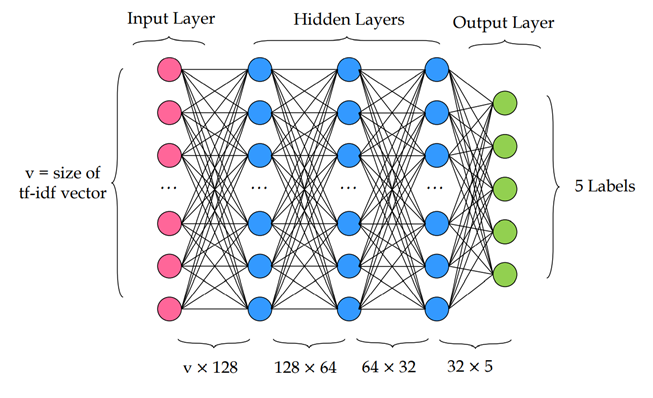

In [ ]:
# 실습 1-3
# torch.nn.Linear(input, output) 함수를 사용하여 모델을 구현해주세요
# 모델 각 레이어 가중치의 크기는 위 그림을 따라 설정해주세요

class MLP(torch.nn.Module):

    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
 
        # 이곳에 코드를 작성해주세요 #
        self.linear1 = 
        self.linear2 = 
        self.linear3 = 
        self.linear4 =
        # ------------------------- #

    def forward(self, inputs):
        # 이곳에 코드를 작성해주세요 #
        y1 = 
        y2 = 
        y3 = 
        # ------------------------- #

        return torch.sigmoid(self.linear4(y3))

In [ ]:
# 실습 1-4
# model로부터 예측값을 받아오고,
# 예측값과 정답 간의 loss를 계산하는 코드를 작성해주세요.
# loss 함수로는 crossentropy loss 함수를 사용합니다. (criterion에 정의되어 있음)

def train(model, train_dataset, args):

    set_seed(42)

    train_batch_size = args["train_batch_size"]
    num_train_epochs = args["num_train_epochs"]
    device = args["device"]
    learning_rate = args["learning_rate"]

    # optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Loss function
    criterion = torch.nn.CrossEntropyLoss()

    train_dataLoader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=train_batch_size)

    train_iterator = trange(num_train_epochs, desc="Epoch")

    print("\n***** Running training *****")
    print("  Num examples = {}".format(len(train_dataset)))
    print("  Num Epochs = {}".format(num_train_epochs))
    print("  Train Batch size = {}".format(train_batch_size))
    print("  Device = ", device)

    model.to(device)
    model.train(True)
    model.zero_grad()
    for epoch in train_iterator:
        loss = 0
        for batch in train_dataLoader:
            input_vector = batch[0].to(device)
            label = batch[1].to(device)
            
            # 이곳에 코드를 작성해주세요 #
            predict = 
            loss = 
            # ------------------------- #
            loss += loss.item()

            loss.backward()
            optimizer.step()
            model.zero_grad()

        if (epoch + 1) % 10 == 0:
            print("\n********** Train Result **********")
            print("  Epoch / Total Epoch : {} / {}".format(epoch + 1, num_train_epochs))
            print("  Loss : {:.4f}".format(loss))

    model.train(False)
# end of train

In [ ]:
# 실습 1-5
# model 선언을 위한 input_dim과 output_dim 을 설정해주세요

input_dim = # 이곳에 코드를 작성해주세요 #
output_dim = # 이곳에 코드를 작성해주세요 #


model = MLP(input_dim, output_dim)


args = dict()
args["train_batch_size"] = 64
args["device"] = torch.device("cuda" if torch.cuda.is_available() else "cpu")
args["learning_rate"] = 0.001
args["num_train_epochs"] = 1000

train(model, train_dataset, args)

## 모델 학습 후 평가 (Evaluation)

In [ ]:
def evaluate(model, test_dataset, args, news_num=900):
    test_dataLoader = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=1)

    device = args["device"]

    print("***** Running evaluation *****")
    print("  Num examples = {}".format(len(test_dataset)))
    print("  Test Batch size = 1")

    model.eval()
    pred = None
    label = None
    for batch in test_dataLoader:
        input_vector = batch[0].to(device)

        with torch.no_grad():
            predict = model(input_vector)

        if pred is None:
            pred = predict.detach().cpu().numpy()
            label = batch[1].numpy()
        else:
            pred = np.append(pred, predict.detach().cpu().numpy(), axis=0)
            label = np.append(label, batch[1].numpy(), axis=0)

    pred = np.argmax(pred, axis=1)

    news_num -= 800
    sample_pred = pred[news_num]
    sample_label = label[news_num]
    sample_result = {"pred": sample_pred, "label": sample_label}

    accuracy = (pred == label).sum() / 200

    return accuracy, sample_result

In [ ]:
accuracy, sample_result = evaluate(model, test_dataset, args, news_num=900)

print("\n********** Total Test Result **********")
print("  Accuracy {}".format(accuracy))
print("  Sample pred : {}".format(sample_result["pred"]))
print("  Sample label : {}".format(sample_result["label"]))


with open("MLP_result.txt", "w") as fw :
  fw.write("********** Total Test Result **********")
  fw.write("\n  Accuracy {}".format(accuracy))
  fw.write("\n  Sample pred : {}".format(sample_result["pred"]))
  fw.write("\n  Sample label : {}".format(sample_result["label"]))

## 전체 코드

In [ ]:
train_path = "./text_classification_2022/newsdata_train.json"
test_path = "./text_classification_2022/newsdata_test.json"
label_list = ['IT', '경제', '문화', '스포츠', '정치']

train_data = load_data(train_path)
test_data = load_data(test_path)

args = dict()
args["train_batch_size"] = 64
args["device"] = torch.device("cuda" if torch.cuda.is_available() else "cpu")
args["learning_rate"] = 0.001
args["num_train_epochs"] = 1000

komoran = Komoran("EXP")

tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer)

train_input = get_content(train_data, tfidf_vectorizer)
train_output = get_label(train_data, label_list)

train_dataset = make_dataset(train_input, train_output)

test_input = get_content(test_data, tfidf_vectorizer, mode="test")
test_output = get_label(test_data, label_list)

test_dataset = make_dataset(test_input, test_output)

input_dim = train_input.shape[-1]
output_dim = len(label_list)

model = MLP(input_dim, output_dim)

train(model, train_dataset, args)

accuracy, sample_result = evaluate(model, test_dataset, args, news_num=900)

print("\n********** Total Test Result **********")
print("  Accuracy {}".format(accuracy))
print("  Sample pred : {}".format(sample_result["pred"]))
print("  Sample label : {}".format(sample_result["label"]))